<h1 style="color: green;">Home task : FastAi. Collaborative filtering</h1>

In [391]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from apyori import apriori


# Load the data


In [480]:
file_path = "/Users/user/Desktop/Camp2025/lesson_17/data/Groceries_dataset.csv"
df = pd.read_csv(file_path)
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


(38765, 3)


(array([1.008e+04, 2.698e+03, 1.390e+03, 3.440e+02, 1.750e+02, 8.000e+01,
        1.450e+02, 5.000e+01, 0.000e+00, 1.000e+00]),
 array([ 2. ,  2.9,  3.8,  4.7,  5.6,  6.5,  7.4,  8.3,  9.2, 10.1, 11. ]),
 <BarContainer object of 10 artists>)

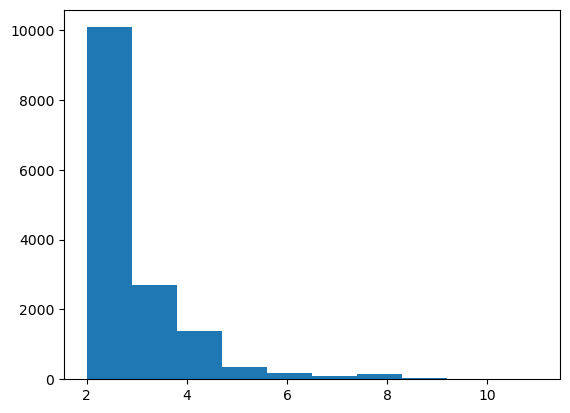

In [482]:
print(df.shape)
dist = [len(g) for k, g in df.groupby(['Member_number', 'Date'])]
plt.hist(dist)


In [483]:
transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).tolist()

for i, t in enumerate(transactions[:10], 1):
    print(f" {i}: {t}")


 1: ['sausage', 'whole milk', 'semi-finished bread', 'yogurt']
 2: ['whole milk', 'pastry', 'salty snack']
 3: ['canned beer', 'misc. beverages']
 4: ['sausage', 'hygiene articles']
 5: ['soda', 'pickled vegetables']
 6: ['frankfurter', 'curd']
 7: ['sausage', 'whole milk', 'rolls/buns']
 8: ['whole milk', 'soda']
 9: ['beef', 'white bread']
 10: ['frankfurter', 'soda', 'whipped/sour cream']


In [518]:
rules = list(apriori(transactions, min_support = 0.0, min_confidence = 0.3, min_lift = 2, min_length = 2))
rules

[]

In [506]:
len(rules)


27

In [508]:
def print_rules(rules):
    for rule in rules:
        print ('rule.items=', list(rule.items))
        print ('rule.support=',rule.support)

        for os in rule.ordered_statistics:
            print ('\titems_base=', list(os.items_base))
            print ('\tlifted_item =', list(os.items_add))
            print ('\tlift=', os.lift)
            print ('\tconfidence (i.e. cond prob {} if {})='.format(list(os.items_add), list(os.items_base)), os.confidence)
            print ('\n')
        
print_rules(rules)
        

rule.items= ['whole milk', 'artif. sweetener']
rule.support= 0.0005346521419501437
	items_base= ['artif. sweetener']
	lifted_item = ['whole milk']
	lift= 1.7468151239657366
	confidence (i.e. cond prob ['whole milk'] if ['artif. sweetener'])= 0.2758620689655173


rule.items= ['turkey', 'bottled water']
rule.support= 0.0006014836596939117
	items_base= ['turkey']
	lifted_item = ['bottled water']
	lift= 1.8538959251101321
	confidence (i.e. cond prob ['bottled water'] if ['turkey'])= 0.1125


rule.items= ['whole milk', 'brandy']
rule.support= 0.0008688097306689834
	items_base= ['brandy']
	lifted_item = ['whole milk']
	lift= 2.1662805978127717
	confidence (i.e. cond prob ['whole milk'] if ['brandy'])= 0.34210526315789475


rule.items= ['sausage', 'cake bar']
rule.support= 0.0006683151774376796
	items_base= ['cake bar']
	lifted_item = ['sausage']
	lift= 1.8011218643170108
	confidence (i.e. cond prob ['sausage'] if ['cake bar'])= 0.10869565217391304


rule.items= ['flour', 'tropical fruit']
ru

In [510]:
records = []
for rec in rules:
    for os in rec.ordered_statistics:
        if not os.items_base:
            continue    
        records.append({
            'Base': tuple(os.items_base),
            'Add':  tuple(os.items_add),
            'Support': rec.support,
            'Confidence': os.confidence,
            'Lift': os.lift
        })

rules_df = pd.DataFrame(records)
top10 = rules_df.sort_values('Lift', ascending=False).head(10)

print(top10.to_string(index=False))


                            Base                 Add  Support  Confidence     Lift
                 (sausage, pork)       (whole milk,) 0.000601    0.391304 2.477819
                (sweet spreads,)        (pip fruit,) 0.000535    0.117647 2.398301
                (sweet spreads,)   (tropical fruit,) 0.000735    0.161765 2.387066
(rolls/buns, whipped/sour cream)           (yogurt,) 0.000601    0.204545 2.381800
                       (spices,)             (soda,) 0.000601    0.225000 2.317051
        (shopping bags, sausage) (other vegetables,) 0.000535    0.275862 2.259291
            (whole milk, yogurt)          (sausage,) 0.001470    0.131737 2.182917
                  (soda, pastry)          (sausage,) 0.000535    0.131148 2.173157
                       (brandy,)       (whole milk,) 0.000869    0.342105 2.166281
              (whole milk, pork)          (sausage,) 0.000601    0.120000 1.988439
